In [1]:
# to import libraries

import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
sns.set_theme()

In [2]:
# to import Call Center Data csv

cc = pd.read_csv(os.path.abspath('data/Call Center Data.csv'))
cc.sample(5)

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
453,454,85,79,92.94%,6,0:00:24,0:02:31,0:03:07,72.29%
603,604,116,108,93.10%,8,0:00:19,0:02:26,0:02:33,84.07%
1043,1044,178,167,93.82%,11,0:00:22,0:02:42,0:05:24,74.86%
1212,1213,230,222,96.52%,8,0:00:21,0:02:46,0:02:45,72.25%
427,428,159,149,93.71%,10,0:00:33,0:02:40,0:04:32,61.04%


In [3]:
# to remove Index column

cc.drop('Index', axis=1, inplace=True)
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Incoming Calls              1251 non-null   int64 
 1   Answered Calls              1251 non-null   int64 
 2   Answer Rate                 1251 non-null   object
 3   Abandoned Calls             1251 non-null   int64 
 4   Answer Speed (AVG)          1251 non-null   object
 5   Talk Duration (AVG)         1251 non-null   object
 6   Waiting Time (AVG)          1251 non-null   object
 7   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.3+ KB


In [4]:
# to fix columns Dtype

cc['Answer Rate'] = pd.to_numeric(cc['Answer Rate'].str.replace('%', '', regex=False))/100
cc['Service Level (20 Seconds)'] = pd.to_numeric(cc['Service Level (20 Seconds)'].str.replace('%', '', regex=False))/100
cc.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,0.9401,13,0:00:17,0:02:14,0:02:45,0.7628
1,200,182,0.9100,18,0:00:20,0:02:22,0:06:55,0.7273
2,216,198,0.9167,18,0:00:18,0:02:38,0:03:50,0.7430
3,155,145,0.9355,10,0:00:15,0:02:29,0:03:12,0.7961
4,37,37,1.0000,0,0:00:03,0:02:06,0:00:35,0.9730


In [5]:
# to define a function to create new Answer Speed, Talk Duration and Waiting Time columns in seconds

def to_sec(df, old_col, new_col):
    if df[old_col].dtype == 'object': 
        time_list = [time.strptime(el, '%H:%M:%S') for el in df[old_col]]
        df[new_col] = [datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
                       for x in time_list]
    else:
        raise ValueError(f'Invalid dtype for {old_col}. old_col has to be string dtype')
    return df

In [6]:
to_sec(cc, 'Answer Speed (AVG)', 'Answer Speed (sec)')
to_sec(cc, 'Talk Duration (AVG)', 'Talk Duration (sec)')
to_sec(cc, 'Waiting Time (AVG)', 'Waiting Time (sec)')
cc.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Answer Speed (sec),Talk Duration (sec),Waiting Time (sec)
0,217,204,0.9401,13,0:00:17,0:02:14,0:02:45,0.7628,17.0,134.0,165.0
1,200,182,0.9100,18,0:00:20,0:02:22,0:06:55,0.7273,20.0,142.0,415.0
2,216,198,0.9167,18,0:00:18,0:02:38,0:03:50,0.7430,18.0,158.0,230.0
3,155,145,0.9355,10,0:00:15,0:02:29,0:03:12,0.7961,15.0,149.0,192.0
4,37,37,1.0000,0,0:00:03,0:02:06,0:00:35,0.9730,3.0,126.0,35.0


In [7]:
# new columns dtype is float

cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Incoming Calls              1251 non-null   int64  
 1   Answered Calls              1251 non-null   int64  
 2   Answer Rate                 1251 non-null   float64
 3   Abandoned Calls             1251 non-null   int64  
 4   Answer Speed (AVG)          1251 non-null   object 
 5   Talk Duration (AVG)         1251 non-null   object 
 6   Waiting Time (AVG)          1251 non-null   object 
 7   Service Level (20 Seconds)  1251 non-null   float64
 8   Answer Speed (sec)          1251 non-null   float64
 9   Talk Duration (sec)         1251 non-null   float64
 10  Waiting Time (sec)          1251 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 107.6+ KB


In [8]:
# to explore statistics about some variables and their correlations 

cc[['Answer Rate', 'Incoming Calls', 'Talk Duration (sec)']].describe()

,Answer Rate,Incoming Calls,Talk Duration (sec)
count,1251.000000,1251.000000,1251.000000
mean,0.926925,198.539568,157.551559
std,0.084609,156.534195,23.703087
min,0.221000,5.000000,57.000000
25%,0.913500,123.000000,142.000000
50%,0.949300,177.000000,157.000000
75%,0.972400,233.000000,171.000000
max,1.000000,1575.000000,288.000000


Skewness: -3.6994936470459283
Kurtosis: 19.42142705000703


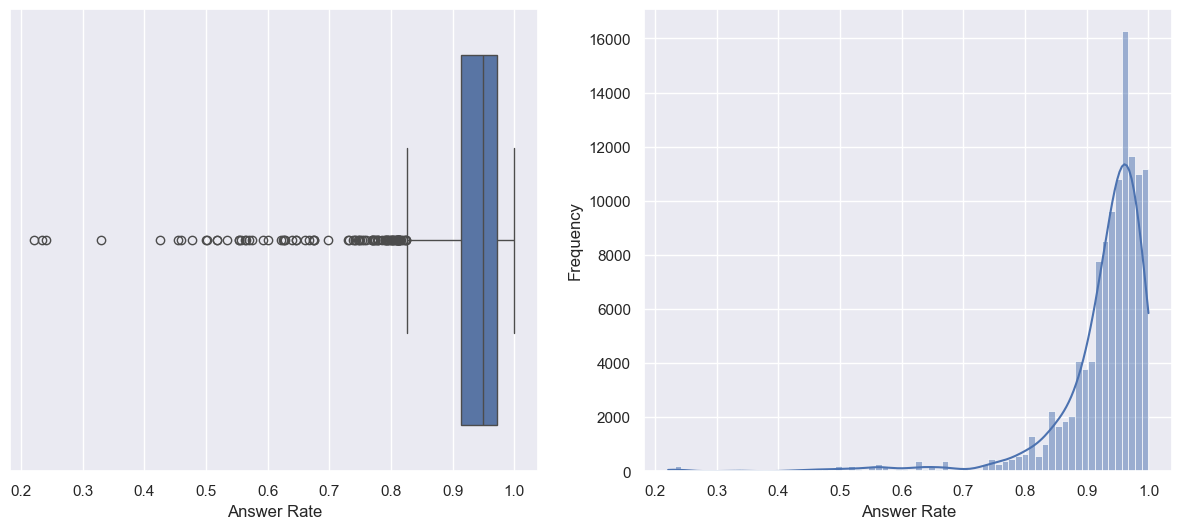

In [9]:
print('Skewness:', stats.skew(cc['Answer Rate']))
print('Kurtosis:', stats.kurtosis(cc['Answer Rate']))
sns.set_theme(rc={'figure.figsize': (15, 6)})
fig, ax = plt.subplots(1, 2)
sns.boxplot(x='Answer Rate', data=cc, ax=ax[0])
sns.histplot(x='Answer Rate', data=cc, stat='frequency', kde=True, ax=ax[1])
plt.show()

Skewness: 3.012998796350161
Kurtosis: 15.296911576695152


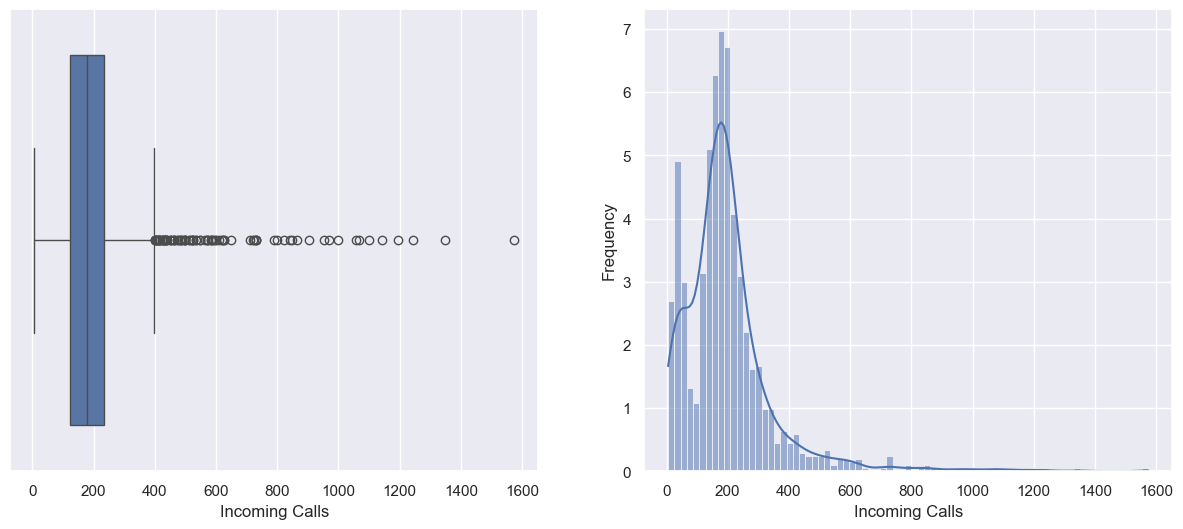

In [10]:
print('Skewness:', stats.skew(cc['Incoming Calls']))
print('Kurtosis:', stats.kurtosis(cc['Incoming Calls']))
fig, ax = plt.subplots(1, 2)
sns.boxplot(x='Incoming Calls', data=cc, ax=ax[0])
sns.histplot(x='Incoming Calls', data=cc, stat='frequency', kde=True, ax=ax[1])
plt.show()

Skewness: 0.4667250117132546
Kurtosis: 1.6530456293906859


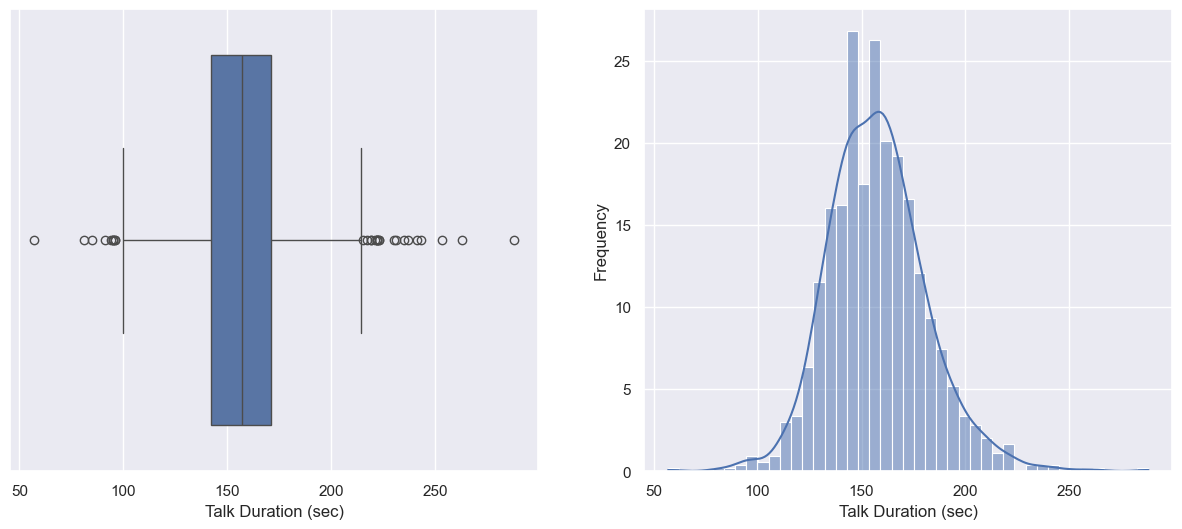

In [11]:
print('Skewness:', stats.skew(cc['Talk Duration (sec)']))
print('Kurtosis:', stats.kurtosis(cc['Talk Duration (sec)']))
fig, ax = plt.subplots(1, 2)
sns.boxplot(x='Talk Duration (sec)', data=cc, ax=ax[0])
sns.histplot(x='Talk Duration (sec)', data=cc, stat='frequency', kde=True, ax=ax[1])
plt.show()

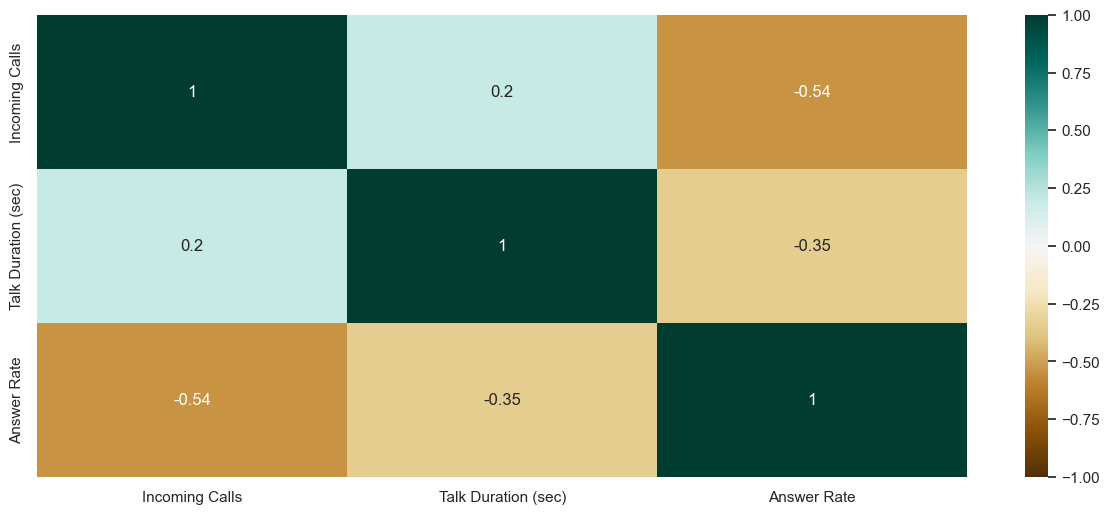

In [20]:
sns.heatmap(cc[['Incoming Calls', 'Talk Duration (sec)', 'Answer Rate']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [13]:
cc[['Waiting Time (sec)', 'Service Level (20 Seconds)']].describe()

,Waiting Time (sec),Service Level (20 Seconds)
count,1251.000000,1251.000000
mean,232.314948,0.708729
std,190.647960,0.184528
min,3.000000,0.000000
25%,118.000000,0.602100
50%,182.000000,0.741400
75%,276.000000,0.841400
max,1551.000000,1.000000


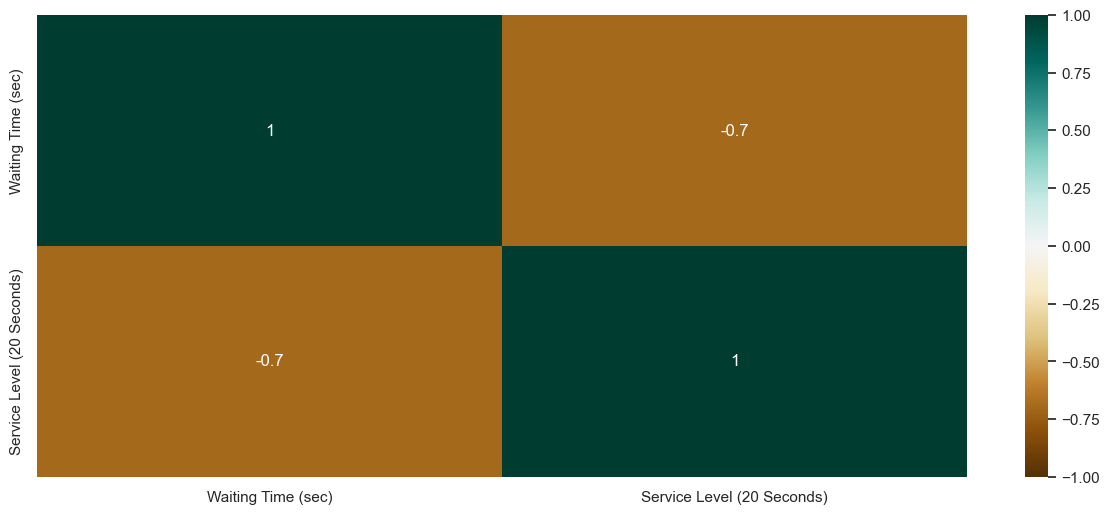

In [22]:
sns.heatmap(cc[['Waiting Time (sec)', 'Service Level (20 Seconds)']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

# there's a very negative correlation (-0.7); more is waiting time, less is the service level

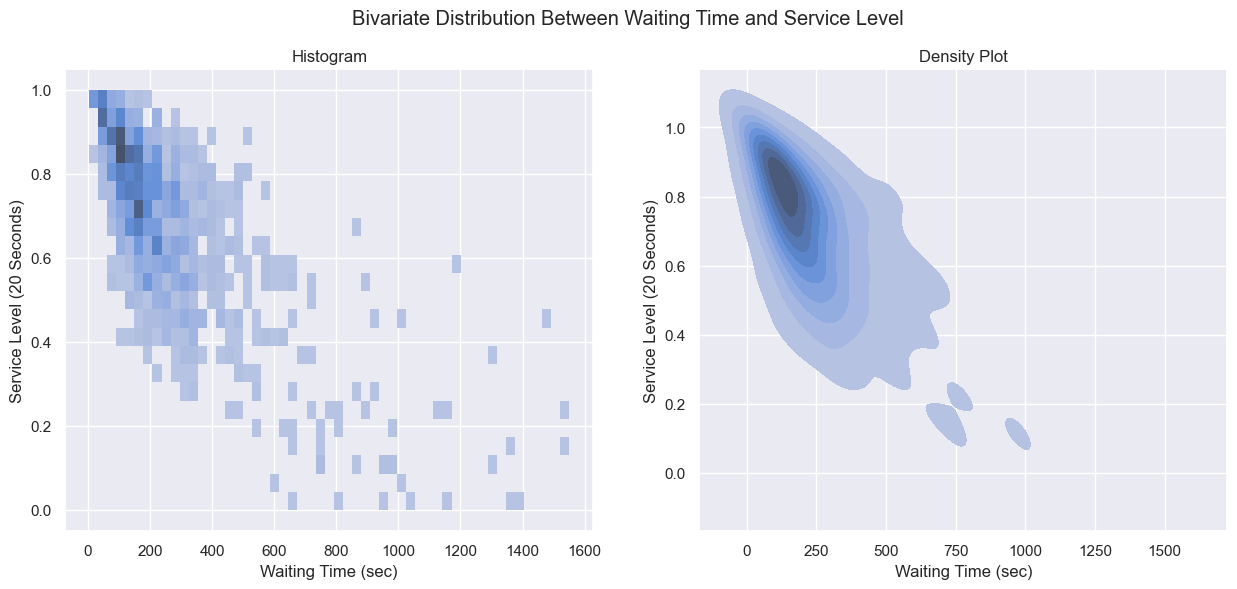

In [15]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Bivariate Distribution Between Waiting Time and Service Level')
sns.histplot(x='Waiting Time (sec)', y='Service Level (20 Seconds)', data=cc, ax=ax[0]).set_title('Histogram')
sns.kdeplot(x='Waiting Time (sec)', y='Service Level (20 Seconds)', data=cc, fill=True, ax=ax[1]).set_title('Density Plot')
plt.show()

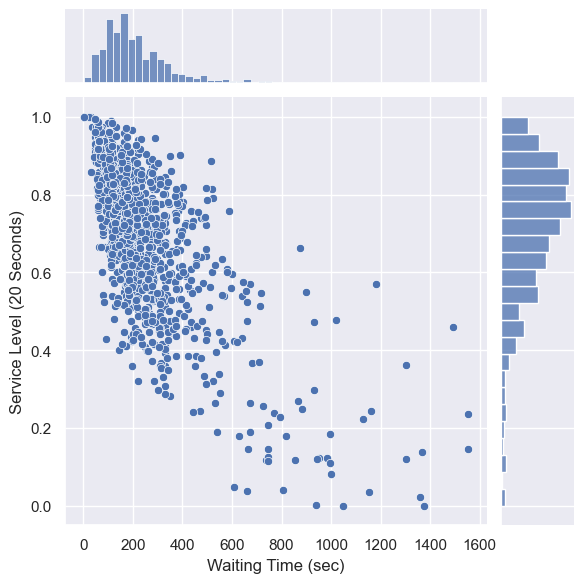

In [16]:
sns.jointplot(x='Waiting Time (sec)', y='Service Level (20 Seconds)', data=cc)
plt.show()